In [11]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [12]:
# Understanding data - csv
# image_path = '/media/nicolas/Lenovo/Projects/UnderstandingAmazon/data'


In [13]:
train_data = pd.read_csv(os.path.join('data','train_v2.csv'))

In [14]:
train_data.head()

,image_name,tags
0,train_0,haze primary
1,train_1,agriculture clear primary water
2,train_2,clear primary
3,train_3,clear primary
4,train_4,agriculture clear habitation primary road


In [15]:
class_num = train_data['tags'].value_counts()
class_num

clear primary                                               13636
partly_cloudy primary                                        3630
cloudy                                                       2089
clear primary water                                          1850
agriculture clear primary road                               1680
                                                            ...  
agriculture clear cultivation cultivation road                  1
artisinal_mine bare_ground partly_cloudy primary road           1
agriculture clear conventional_mine primary road                1
clear conventional_mine habitation road                         1
agriculture partly_cloudy primary road conventional_mine        1
Name: tags, Length: 449, dtype: int64

In [16]:
from collections import Counter
counter = Counter()
for pic in train_data['tags'].str.split():
    counter.update(pic)


In [17]:
individual_classes = pd.DataFrame(counter.values(),counter.keys()).sort_values(by =0 , ascending = False)
individual_classes.rename({0:'class'},axis = 1,inplace = True)

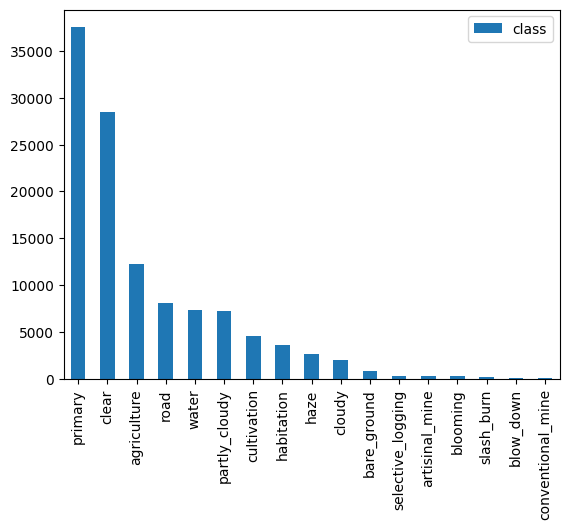

In [18]:
individual_classes.plot.bar()
plt.show()

In [19]:
#Chips that are labeled as cloudy should have no other labels, but there may be labeling errors
#correct

In [20]:
train_data[~(train_data['tags'].str.contains('partly_cloudy'))&
            (train_data['tags'].str.contains('cloudy'))&
            (train_data['tags'].str.split().apply(lambda x:len(x)) != 1)]


,image_name,tags
